In [1]:
import json
import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

## Data

In [2]:
with open("config.json", "r") as f:
    CONFIG=json.load(f)

In [3]:
CONFIG

{'ABEL_CABALLERO_BIRTHDAY': 9,
 'CELTA_CHAMPIONS_DAY': 19,
 'GROUPS': ['AgileVigo',
  'AIndustriosa',
  'CodeSign',
  'GALPon',
  'GalsTech',
  'GDGVigo',
  'JoomlaVigo',
  'JavascriptVigo',
  'PHPVigo',
  'PythonVigo',
  'SeoGalicia',
  'SysAdminGalicia',
  'UxGalicia',
  'VigoBrain',
  'VigoJug',
  'VigoLabs',
  'Vigo++',
  'VigoDevOps',
  'Python2Vigo',
  'AnsibleVigo',
  'MatlabVigo',
  'RVigo',
  'ViGo',
  'VigoÑapas',
  'FortranVigo',
  'EnsambladorVigo',
  'HaskellVigo'],
 'N_DAYS': 20,
 'N_GROUPS': 27,
 'N_MEMBERS_PER_GROUP': 30}

In [4]:
members=pd.read_csv('members.csv')

In [5]:
members.head()

,group,favourite_day,hates_celta,hates_pharaon
0,ViGo,9,0,1
1,AnsibleVigo,6,0,0
2,PHPVigo,0,0,0
3,VigoBrain,11,0,0
4,GALPon,12,0,0


---

## Fitness function

In [6]:
def fitness(calendar):
    scores = np.zeros(CONFIG["N_DAYS"])

    scores[CONFIG["CELTA_CHAMPIONS_DAY"]] -= 4
    scores[CONFIG["ABEL_CABALLERO_BIRTHDAY"]] -= 8

    for x in members.groupby("group", sort=False):
        group = x[0]
        n_members = len(x[1])
        favorite_day_counts = x[1]["favourite_day"].value_counts()

        if group in calendar:
            proposed_day = np.where(calendar == group)[0][0]

            if proposed_day in favorite_day_counts:
                scores[proposed_day] += favorite_day_counts[proposed_day] * 2

            scores[proposed_day] += n_members

        else:
            if group == "VigoBrain":
                scores -= 2
            for day, n in favorite_day_counts.items():
                if group == "VigoBrain":
                    scores[day] -= n * 5
                else:
                    scores[day] -= n * 2

    return scores

---

## Solution

In [7]:
from deap import base, creator, tools, algorithms


In [8]:
def getFitness(indCalendar):
    return np.sum(fitness(np.array(CONFIG["GROUPS"])[indCalendar][:CONFIG["N_DAYS"]])),

In [9]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [10]:
toolbox = base.Toolbox()
toolbox.register("indices", np.random.permutation, len(CONFIG["GROUPS"]))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [11]:
print(toolbox.indices())

[ 5  9 15  4 16  8 19 26 20 21 10 13  1  2  3 14 18 23 12 22  6  0 11 25 17
  7 24]


In [12]:
print(toolbox.individual())

[23, 0, 8, 3, 7, 2, 16, 22, 20, 14, 13, 17, 15, 21, 26, 10, 25, 11, 18, 19, 12, 1, 6, 9, 24, 4, 5]


In [13]:
print(toolbox.population(5))

[[15, 0, 10, 23, 21, 25, 2, 4, 26, 9, 11, 7, 18, 19, 24, 16, 14, 22, 5, 12, 3, 1, 6, 8, 20, 17, 13], [8, 1, 20, 18, 7, 4, 0, 24, 22, 2, 26, 13, 9, 14, 17, 5, 21, 19, 11, 25, 10, 12, 23, 3, 16, 15, 6], [17, 13, 19, 12, 1, 11, 4, 0, 24, 25, 22, 26, 21, 15, 7, 8, 20, 16, 3, 18, 5, 10, 14, 23, 2, 6, 9], [21, 9, 10, 0, 13, 18, 7, 14, 8, 2, 22, 26, 5, 1, 12, 15, 20, 11, 4, 24, 3, 16, 25, 19, 6, 17, 23], [8, 4, 6, 17, 7, 5, 21, 2, 12, 1, 15, 3, 22, 26, 24, 11, 19, 0, 9, 20, 14, 10, 23, 18, 13, 16, 25]]


In [14]:
toolbox.register("evaluate", getFitness)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [18]:
print(toolbox.evaluate(toolbox.individual())[0])

197.0


In [19]:
ind1=toolbox.individual()
print(ind1)
ind2=toolbox.individual()
print(ind2)
print(toolbox.mate(ind1,ind2))

[6, 9, 3, 20, 15, 8, 16, 13, 14, 2, 12, 25, 23, 11, 18, 17, 22, 21, 0, 10, 19, 24, 5, 7, 4, 1, 26]
[25, 15, 7, 24, 10, 26, 2, 20, 6, 3, 21, 23, 5, 1, 14, 0, 12, 4, 9, 13, 8, 18, 19, 17, 11, 22, 16]
([14, 9, 16, 13, 10, 26, 2, 24, 6, 3, 21, 23, 25, 11, 18, 17, 22, 12, 0, 15, 19, 20, 5, 7, 4, 1, 8], [23, 10, 7, 20, 15, 8, 3, 13, 14, 16, 12, 25, 5, 1, 6, 0, 21, 4, 9, 24, 26, 18, 19, 17, 11, 22, 2])


In [21]:
ind=toolbox.individual()
print(ind)
print(toolbox.mutate(ind))


[25, 0, 20, 4, 22, 6, 26, 14, 23, 5, 11, 17, 19, 3, 24, 8, 21, 15, 7, 16, 18, 10, 2, 13, 12, 1, 9]
([26, 20, 0, 4, 22, 6, 25, 14, 23, 5, 11, 17, 19, 3, 24, 8, 21, 15, 7, 16, 18, 10, 2, 13, 12, 1, 9],)


In [22]:
inds=toolbox.population(3)
print(inds)
print(toolbox.evaluate(inds[0]))
print(toolbox.evaluate(inds[1]))
print(toolbox.evaluate(inds[2]))
print(toolbox.select(inds,2))

[[22, 21, 4, 19, 8, 3, 7, 1, 10, 14, 9, 2, 20, 5, 24, 6, 11, 23, 0, 16, 17, 25, 15, 26, 18, 13, 12], [3, 10, 7, 17, 16, 26, 13, 20, 18, 21, 23, 9, 24, 12, 15, 25, 0, 19, 22, 1, 14, 8, 2, 4, 11, 5, 6], [2, 23, 10, 25, 15, 19, 17, 14, 16, 11, 18, 21, 6, 20, 22, 26, 3, 7, 9, 8, 1, 5, 12, 24, 4, 0, 13]]
(-19.0,)
(223.0,)
(30.0,)
[[2, 23, 10, 25, 15, 19, 17, 14, 16, 11, 18, 21, 6, 20, 22, 26, 3, 7, 9, 8, 1, 5, 12, 24, 4, 0, 13], [3, 10, 7, 17, 16, 26, 13, 20, 18, 21, 23, 9, 24, 12, 15, 25, 0, 19, 22, 1, 14, 8, 2, 4, 11, 5, 6]]


In [26]:
pop = toolbox.population(n=100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("max", np.max)

['SysAdminGalicia' 'PHPVigo' 'PythonVigo' 'Python2Vigo' 'VigoBrain'
 'CodeSign' 'AIndustriosa' 'FortranVigo' 'EnsambladorVigo' 'SeoGalicia'
 'VigoÑapas' 'HaskellVigo' 'GALPon' 'JavascriptVigo' 'VigoJug' 'MatlabVigo'
 'UxGalicia' 'VigoDevOps' 'GDGVigo' 'JoomlaVigo']
469.0


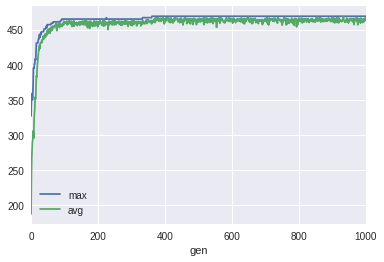

In [27]:
result, log = algorithms.eaSimple(pop, toolbox,stats=stats,cxpb=0.8, mutpb=0.2,ngen=1000, verbose=False)
logdf=pd.DataFrame(log)
logdf.plot(['gen'],['max','avg'])
top=tools.selBest(result,1)

print(np.array(CONFIG["GROUPS"])[top[0]][:CONFIG["N_DAYS"]])
print(toolbox.evaluate(top[0])[0])